<a href="https://colab.research.google.com/github/shuvoedward/Machine-learning/blob/master/random_forest%2Cdecision_tree/kphosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# necessary imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
import io

uploaded = files.upload()

Saving kyphosis.csv to kyphosis.csv


In [3]:
# reading in the data 

k_data = pd.read_csv(io.StringIO(uploaded['kyphosis.csv'].decode('utf-8')), sep=',')

In [4]:
k_data.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


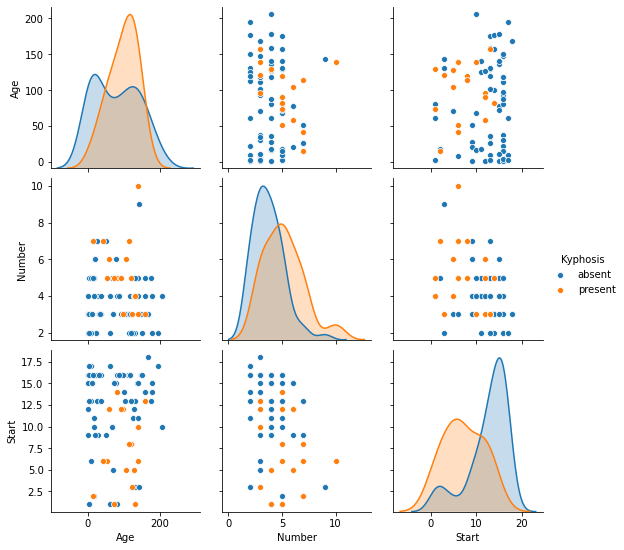

In [7]:
# visualize the whole data 
sns.pairplot(data=k_data, hue='Kyphosis')

In [8]:
from sklearn.model_selection import train_test_split

X = k_data.drop('Kyphosis', axis=1)
y = k_data['Kyphosis'] # want to predict kyphosis column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#
#
# Decision Tree
# better for smaller data
#
from sklearn.tree import DecisionTreeClassifier
# instantiate the model
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train) # fitting the data in the model

prediction = dt.predict(X_test)



In [9]:
# importing the metrics
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[15  3]
 [ 4  3]]


              precision    recall  f1-score   support

      absent       0.79      0.83      0.81        18
     present       0.50      0.43      0.46         7

    accuracy                           0.72        25
   macro avg       0.64      0.63      0.64        25
weighted avg       0.71      0.72      0.71        25



In [10]:
#
# 
# Random Forest
# better for larger data
#

from sklearn.ensemble import RandomForestClassifier

# creating an instance
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
rfc_pred = rfc.predict(X_test) # predicting the data